# Checkpoints - Part 1

## Checkpoint 1: Data Cleaning 1

In [178]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [179]:
#loading the companies data in dataframe companies
companies = pd.read_csv('C:/Users/anishasharma/Documents/Investment Analysis/companies.csv', encoding = 'palmos')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [180]:
#loading the rounds data in dataframe rounds2
rounds2 = pd.read_csv('C:/Users/anishasharma/Documents/Investment Analysis/rounds2.csv', encoding = 'palmos')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00


In [181]:
#number of unique companies in round2 dataframe
rounds2['company_permalink'].str.upper().nunique()

66368

In [182]:
#number of unique companies in companies dataframe
companies['permalink'].str.upper().nunique()

66368

In [183]:
#number of companies in round2 dataframe which are not in companies dataframe
rounds2[~ rounds2['company_permalink'].str.upper().isin(companies['permalink'].str.upper())]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


In [184]:
#merging the 2 dataframes to form master_frame 
companies['permalink'] = companies['permalink'].str.upper()
rounds2['company_permalink'] = rounds2['company_permalink'].str.upper()

master_frame = pd.merge(rounds2, companies, how = 'inner', left_on = 'company_permalink', right_on = 'permalink')

In [185]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [186]:
#number of observations in master_frame
master_frame.shape

(114949, 16)

## Checkpoint 2: Funding Type Analysis

In [187]:
#checking for missing values
master_frame.isnull().any()

company_permalink          False
funding_round_permalink    False
funding_round_type         False
funding_round_code          True
funded_at                  False
raised_amount_usd           True
permalink                  False
name                        True
homepage_url                True
category_list               True
status                     False
country_code                True
state_code                  True
region                      True
city                        True
founded_at                  True
dtype: bool

In [188]:
#number of missing values column-wise
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [189]:
#percentage of missing values column-wise
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
permalink                  0.00
name                       0.00
homepage_url               5.34
category_list              2.97
status                     0.00
country_code               7.55
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.85
dtype: float64

In [190]:
#dropping columns with high missing values (funding_round_code and founded_at)
#not removing raised_amount_at because we need it 
master_frame = master_frame.drop('funding_round_code', axis = 1)
master_frame = master_frame.drop('founded_at', axis = 1)

In [191]:
#checking missing values after deletion
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd         17.39
permalink                  0.00
name                       0.00
homepage_url               5.34
category_list              2.97
status                     0.00
country_code               7.55
state_code                 9.52
region                     8.84
city                       8.84
dtype: float64

In [192]:
#Calculating the most representative value of the investment amount for each of the four funding types
pd.options.display.float_format = '{:.2f}'.format
master_frame.groupby(by ='funding_round_type')['raised_amount_usd'].mean().sort_values(ascending = False)

funding_round_type
post_ipo_debt           168704571.82
post_ipo_equity          82182493.87
secondary_market         79649630.10
private_equity           73308593.03
undisclosed              19242370.23
debt_financing           17043526.02
venture                  11748949.13
grant                     4300576.34
convertible_note          1453438.54
product_crowdfunding      1363131.07
angel                      958694.47
seed                       719818.00
equity_crowdfunding        538368.21
non_equity_assistance      411203.05
Name: raised_amount_usd, dtype: float64

In [193]:
#Retaining the rows with only four investment types
funding_types_frame=pd.DataFrame(master_frame.loc[(master_frame['funding_round_type'] == 'angel') | 
                                                  (master_frame['funding_round_type'] == 'venture') | 
                                                  (master_frame['funding_round_type'] == 'seed') | 
                                                  (master_frame['funding_round_type'] == 'private_equity'), :].
                                groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending = False))

#Just creating a copy of the master_frame dataframe which will be used for ploting in Checkpoint 6
master_frame_for_plot = master_frame[(master_frame['funding_round_type'] == 'venture') 
                            | (master_frame['funding_round_type'] == 'seed')
                            | (master_frame['funding_round_type'] == 'angel')
                            | (master_frame['funding_round_type'] == 'private_equity')]

In [194]:
funding_types_frame.head()

,raised_amount_usd
funding_round_type,
private_equity,73308593.03
venture,11748949.13
angel,958694.47
seed,719818.00


In [195]:
#Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, the most suitable will be 
#Venture
funding_types_frame.loc[(funding_types_frame['raised_amount_usd'] > 5000000) & (funding_types_frame['raised_amount_usd'] < 15000000)]

,raised_amount_usd
funding_round_type,
venture,11748949.13


In [196]:
#filtering the data so it contains only the chosen investment type
master_frame = master_frame[master_frame['funding_round_type'] == 'venture']

In [197]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,nan,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.00,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.00,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,nan,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign


In [198]:
master_frame.shape

(55494, 14)

# Checkpoints - Part 2


## Checkpoint 3: Country Analysis


In [199]:
#the top nine countries which have received the highest total funding for the chosen investment type
top9 = pd.DataFrame(master_frame.groupby(by='country_code')['raised_amount_usd'].sum())

In [200]:
top9.head()

,raised_amount_usd
country_code,
ARE,342617539.00
ARG,314338819.00
ARM,26517500.00
AUS,1322934948.00
AUT,630954952.00


In [201]:
top9 = top9.sort_values(by = 'raised_amount_usd', ascending = False)

In [202]:
top9.head(9)

,raised_amount_usd
country_code,
USA,422510842796.00
CHN,39835418773.00
GBR,20245627416.00
IND,14391858718.00
CAN,9583332317.00
FRA,7259536732.00
ISR,6907514579.00
DEU,6346959822.00
JPN,3363676611.00


In [203]:
top9 = top9.iloc[ : 9, :]

In [204]:
top9

,raised_amount_usd
country_code,
USA,422510842796.00
CHN,39835418773.00
GBR,20245627416.00
IND,14391858718.00
CAN,9583332317.00
FRA,7259536732.00
ISR,6907514579.00
DEU,6346959822.00
JPN,3363676611.00


In [205]:
#identifying the top three English-speaking countries in the data frame top9
#top 3 are USA, GBR and IND
#retaining rows with only USA, GBR and IND country_codes
master_frame = master_frame[(master_frame['country_code'] == 'USA')
                            | (master_frame['country_code'] == 'GBR')
                            | (master_frame['country_code'] == 'IND')]

In [206]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,nan,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,nan,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign
10,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View
11,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View


## Checkpoint 4: Sector Analysis 1

In [207]:
#extracting the primary sector of each category list from the category_list column
master_frame['category_list'] = master_frame['category_list'].str.split('|').str[0]

In [208]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,nan,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms,operating,USA,DE,DE - Other,Delaware City
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,nan,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign
10,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View
11,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View


In [209]:
#loading the mapping data in dataframe mapping
mapping = pd.read_csv('C:/Users/anishasharma/Documents/Investment Analysis/mapping.csv')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [210]:
mapping.category_list = mapping.category_list.replace({'0':'na', '2.na' :'2.0'}, regex=True)
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [211]:
#reshaping the dataframe
mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =['Manufacturing','Automotive & Sports',
                                                              'Cleantech / Semiconductors','Entertainment',
                                                             'Health','News, Search and Messaging','Others',
                                                             'Social, Finance, Analytics, Advertising']) 
mapping = mapping[~(mapping.value == 0)]
mapping = mapping.drop('value', axis = 1)
mapping = mapping.rename(columns = {"variable":"main_sector"})
mapping.head()

,category_list,main_sector
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
7,Advanced Materials,Manufacturing
15,Agriculture,Manufacturing


In [212]:
#merging the dataframes master_frame and mapping
master_frame = master_frame.merge(mapping, how = 'left', on ='category_list')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,main_sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,Entertainment
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,nan,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms,operating,USA,DE,DE - Other,Delaware City,"News, Search and Messaging"
2,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,nan,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,Others
3,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,"Social, Finance, Analytics, Advertising"
4,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,"Social, Finance, Analytics, Advertising"


In [213]:
#list of primary sectors which have no main sectors in the master_frame
print(master_frame[master_frame.main_sector.isnull()].category_list.unique())

[nan 'Nanotechnology' 'Natural Gas Uses' 'Natural Language Processing'
 'Enterprise 2.0' 'Adaptive Equipment' 'Racing' 'Specialty Retail'
 'Biotechnology and Semiconductor' 'Rapidly Expanding' 'Navigation'
 'Product Search' 'GreenTech' 'Retirement']


In [214]:
#retaining the rows which have main_sector values
master_frame = master_frame[~(master_frame.main_sector.isnull())]
len(master_frame.index)

41109

## Checkpoint 5: Sector Analysis 2

In [243]:
#creating three separate data frames D1, D2 and D3 for each of the three countries containing the observations.

#creating dataframe for USA

D1 = master_frame[(master_frame['country_code'] == 'USA') & 
             (master_frame['raised_amount_usd'] >= 5000000) & 
             (master_frame['raised_amount_usd'] <= 15000000)]
D1_gr = D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
D1 = D1.merge(D1_gr, how='left', on ='main_sector')
D1.head()

C:\Users\anishasharma\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,"Social, Finance, Analytics, Advertising",23807376964.00,2714
1,/ORGANIZATION/1-MAINSTREAM,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.00,/ORGANIZATION/1-MAINSTREAM,1 Mainstream,http://www.1mainstream.com,Apps,acquired,USA,CA,SF Bay Area,Cupertino,"News, Search and Messaging",13959567428.00,1582
2,/ORGANIZATION/128-TECHNOLOGY,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11999347.00,/ORGANIZATION/128-TECHNOLOGY,128 Technology,http://www.128technology.com/,Service Providers,operating,USA,MA,Boston,Burlington,Others,26321007002.00,2950
3,/ORGANIZATION/1366-TECHNOLOGIES,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15-10-2013,15000000.00,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,Manufacturing,7258553378.00,799
4,/ORGANIZATION/1366-TECHNOLOGIES,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,09-04-2015,5000000.00,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,Manufacturing,7258553378.00,799


In [244]:
#creating dataframe for GRB

D2 = master_frame[(master_frame['country_code'] == 'GBR') & 
             (master_frame['raised_amount_usd'] >= 5000000) & 
             (master_frame['raised_amount_usd'] <= 15000000)]
D2_gr = D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
D2 = D2.merge(D2_gr, how='left', on ='main_sector')
D2.head()

C:\Users\anishasharma\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/ORGANIZATION/365SCORES,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,5500000.00,/ORGANIZATION/365SCORES,365Scores,http://biz.365scores.com,Android,operating,GBR,H9,London,London,"Social, Finance, Analytics, Advertising",1089404014.00,133
1,/ORGANIZATION/7DIGITAL,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,01-01-2008,8468328.00,/ORGANIZATION/7DIGITAL,7digital,http://about.7digital.com,Content Creators,acquired,GBR,H9,London,London,Entertainment,482784687.00,56
2,/ORGANIZATION/7DIGITAL,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,19-10-2012,10000000.00,/ORGANIZATION/7DIGITAL,7digital,http://about.7digital.com,Content Creators,acquired,GBR,H9,London,London,Entertainment,482784687.00,56
3,/ORGANIZATION/90MIN,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.00,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,Entertainment,482784687.00,56
4,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.00,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,Entertainment,482784687.00,56


In [245]:
#creating dataframe for IND

D3 = master_frame[(master_frame['country_code'] == 'IND') & 
             (master_frame['raised_amount_usd'] >= 5000000) & 
             (master_frame['raised_amount_usd'] <= 15000000)]
D3_gr = D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
D3 = D3.merge(D3_gr, how='left', on ='main_sector')
D3.head()

C:\Users\anishasharma\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,Entertainment,280830000.00,33
1,/ORGANIZATION/21DIAMONDS-INDIA,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.00,/ORGANIZATION/21DIAMONDS-INDIA,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,Others,1013409507.00,110
2,/ORGANIZATION/A-LITTLE-WORLD,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,09-09-2008,6410000.00,/ORGANIZATION/A-LITTLE-WORLD,A LITTLE WORLD,http://alittleworld.com,Finance,operating,IND,16,Mumbai,Mumbai,"Social, Finance, Analytics, Advertising",550549550.00,60
3,/ORGANIZATION/ADLABS-IMAGICA,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,28-10-2014,8180000.00,/ORGANIZATION/ADLABS-IMAGICA,Adlabs Imagica,http://www.adlabsimagica.com,Entertainment,operating,IND,16,IND - Other,Khopoli,Entertainment,280830000.00,33
4,/ORGANIZATION/AGILE,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,01-05-2011,5740000.00,/ORGANIZATION/AGILE,Agile,http://www.agile-ft.com,Finance,operating,IND,16,Mumbai,Mumbai,"Social, Finance, Analytics, Advertising",550549550.00,60


In [246]:
#total number of investments (count)
print(D1.raised_amount_usd.count())
print(D2.raised_amount_usd.count())
print(D3.raised_amount_usd.count())

12012
619
328


In [247]:
#total amount of investment (USD)
print(round(D1.raised_amount_usd.sum(), 2))
print(round(D2.raised_amount_usd.sum(), 2))
print(round(D3.raised_amount_usd.sum(), 2))

107318294664.0
5365228300.0
2949543602.0


In [248]:
#top sectors in D1
D1_gr

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                         1454104361.00         167
Cleantech / Semiconductors                 21206628192.00        2300
Entertainment                               5099197982.00         591
Health                                      8211859357.00         909
Manufacturing                               7258553378.00         799
News, Search and Messaging                 13959567428.00        1582
Others                                     26321007002.00        2950
Social, Finance, Analytics, Advertising    23807376964.00        2714

In [249]:
#top sectors in D2
D2_gr

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                          167051565.00          16
Cleantech / Semiconductors                  1150139665.00         128
Entertainment                                482784687.00          56
Health                                       214537510.00          24
Manufacturing                                361940335.00          42
News, Search and Messaging                   615746235.00          73
Others                                      1283624289.00         147
Social, Finance, Analytics, Advertising     1089404014.00         133

In [250]:
#top sectors in D3
D3_gr

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                          136900000.00          13
Cleantech / Semiconductors                   165380000.00          20
Entertainment                                280830000.00          33
Health                                       167740000.00          19
Manufacturing                                200900000.00          21
News, Search and Messaging                   433834545.00          52
Others                                      1013409507.00         110
Social, Finance, Analytics, Advertising      550549550.00          60

In [251]:
#for the top sector USA , company that received the highest investment
company = D1[D1['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

#for the second top sector USA , company that received the highest investment
company = D1[D1['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                           raised_amount_usd
company_permalink                           
/ORGANIZATION/VIRTUSTREAM        64300000.00
                           raised_amount_usd
company_permalink                           
/ORGANIZATION/SHOTSPOTTER        67933006.00


In [252]:
#for the top sector GBR , company that received the highest investment
company = D2[D2['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

#for the second top sector GBR , company that received the highest investment
company = D2[D2['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                              raised_amount_usd
company_permalink                              
/ORGANIZATION/ELECTRIC-CLOUD        37000000.00
                                     raised_amount_usd
company_permalink                                     
/ORGANIZATION/CELLTICK-TECHNOLOGIES        37500000.00


In [253]:
#for the top sector IND , company that received the highest investment
company = D3[D3['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

#for the second top sector IND , company that received the highest investment
company = D3[D3['main_sector']=='News, Search and Messaging']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                            raised_amount_usd
company_permalink                            
/ORGANIZATION/FIRSTCRY-COM        39000000.00
                                                raised_amount_usd
company_permalink                                                
/ORGANIZATION/GUPSHUP-TECHNOLOGY-INDIA-PVT-LTD        33000000.00


## Checkpoint 6: Plots

### A plot showing the fraction of total investments (globally) in venture, seed, and private equity and the average amount of investment in each funding type

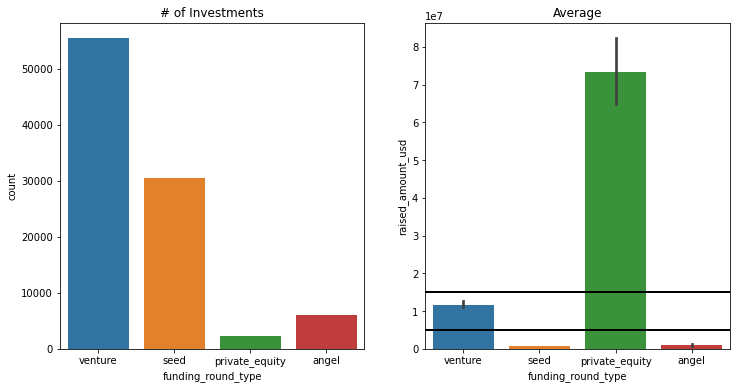

In [254]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="funding_round_type", data=master_frame_for_plot)
plt.title("# of Investments")
plt.subplot(1, 2, 2)
sns.barplot(y='raised_amount_usd', x="funding_round_type", data=master_frame_for_plot, estimator=np.mean)
plt.title('Average')
plt.axhline(y=5000000, linewidth=2, color = 'k')
plt.axhline(y=15000000, linewidth=2, color = 'k')
plt.show()

### A plot showing the top 9 countries against the total amount of investments of funding type FT

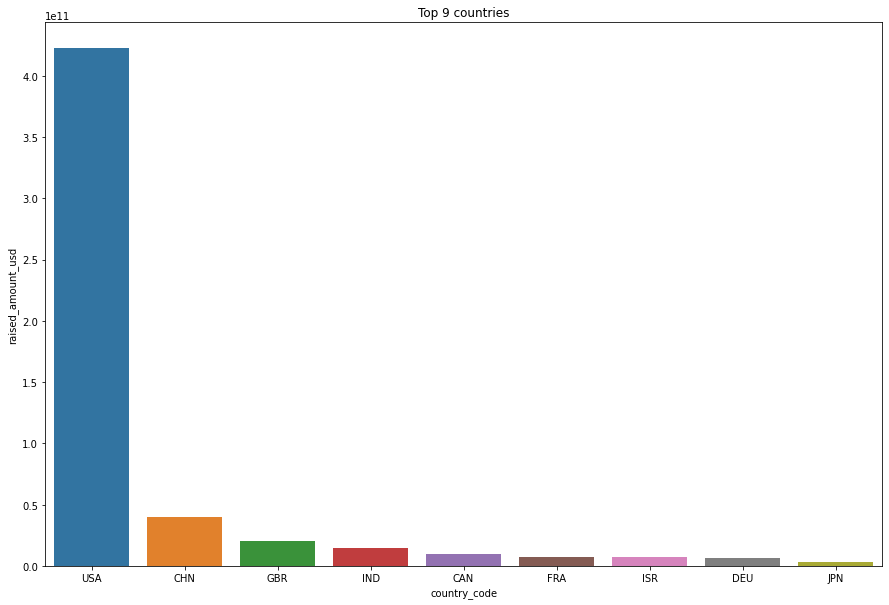

In [255]:
# Plotting sum across top 9 country_code 
top9['country_code'] = top9.index
plt.figure(figsize=(15, 10))
plt.plot(1, 2, 2)
sns.barplot(x='country_code', y='raised_amount_usd', data=top9, estimator=sum)
plt.title('Top 9 countries')
plt.show()

### A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart

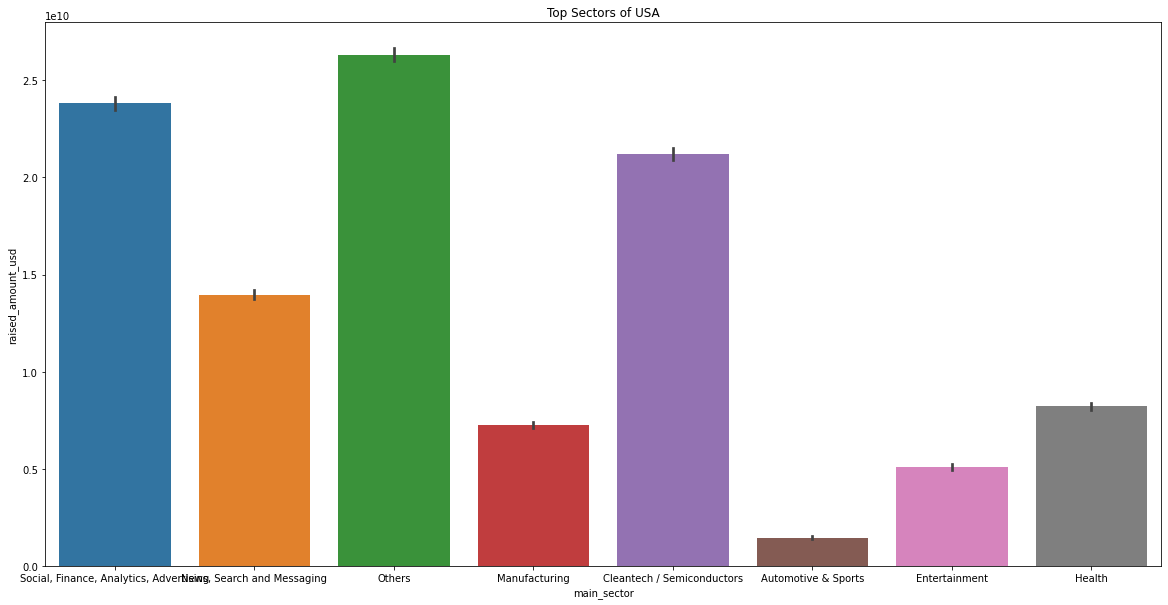

In [256]:
#lets have a look at the top 3 sectors 1st for USA
plt.figure(figsize=(20, 10))
sns.barplot(x ='main_sector', y ='raised_amount_usd',data=D1, estimator=sum)
plt.title('Top Sectors of USA')
plt.show()

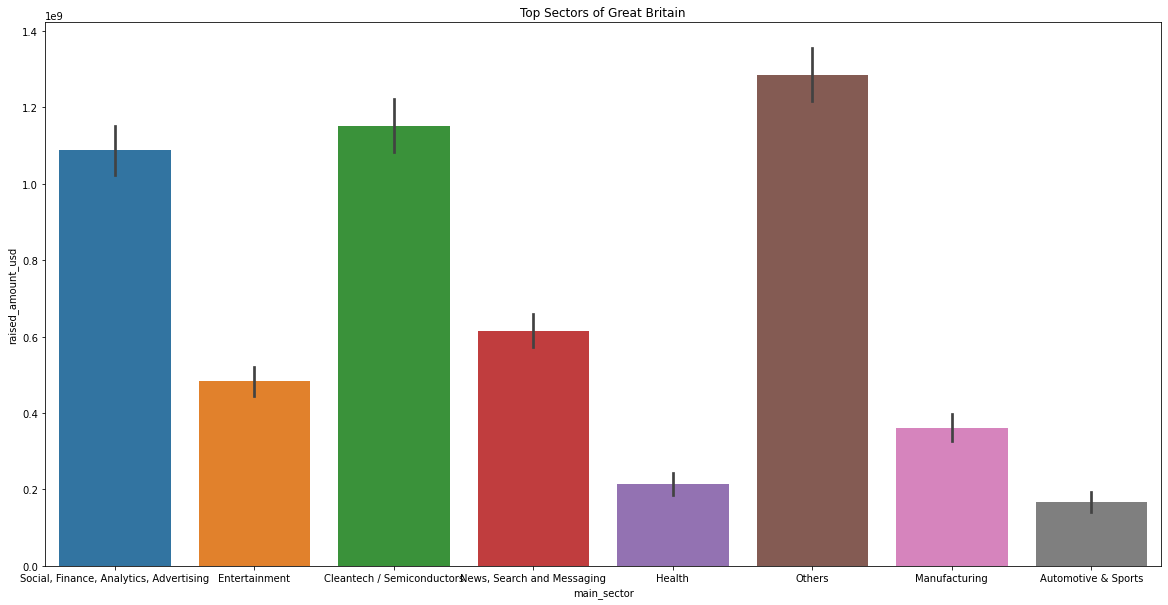

In [257]:
#lets have a look at the top 3 sectors 1st for Great Britian
plt.figure(figsize=(20, 10))
sns.barplot(x='main_sector', y= 'raised_amount_usd', data=D2, estimator=sum)
plt.title('Top Sectors of Great Britain')
plt.show()

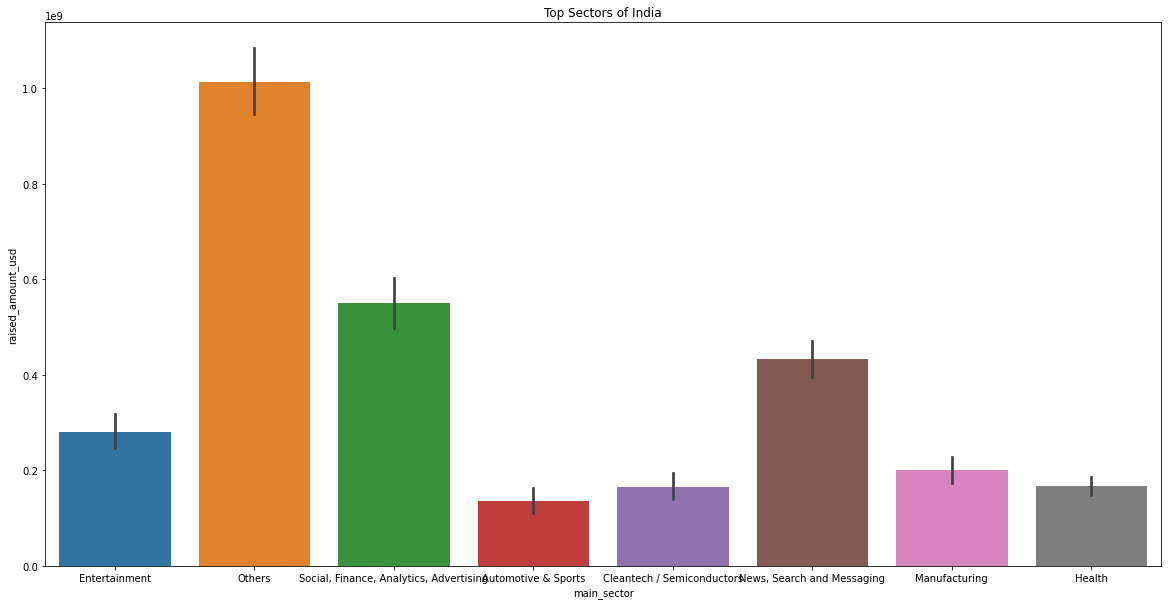

In [258]:
#lets have a look at the top 3 sectors 1st for India
plt.figure(figsize=(20, 10))
sns.barplot(x='main_sector', y='raised_amount_usd', data=D3, estimator=sum)
plt.title('Top Sectors of India')
plt.show()

In [259]:
D1 = D1[D1['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising", "Cleantech / Semiconductors"])]

D2 = D2[D2['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising","Cleantech / Semiconductors"])]

D3 = D3[D3['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising","News, Search and Messaging"])]

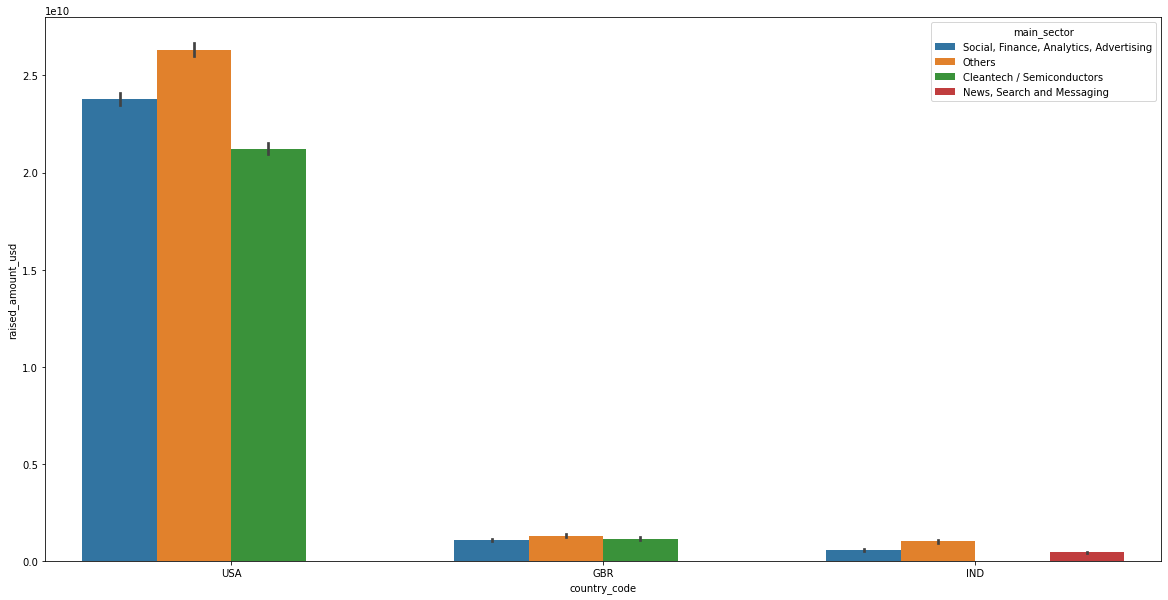

In [261]:
#now lets draw the plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart
frames = [D1, D2, D3]
result = pd.concat(frames)
plt.figure(figsize=(20, 10))
sns.barplot(x='country_code', y='raised_amount_usd', hue='main_sector', data=result, estimator=np.sum)
plt.show()